In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# On Charge Notre dataSet
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target variables

In [2]:
def cost_function(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [5]:
def compute_gradient(x, y, w, b): 
    """
    Calcule Les Gradients pour une regression lineaire
    Arguments:
      x (ndarray (m,)): Dataset Exemples
      y (ndarray (m,)): Target Variables
      w,b (scalaire)    : Paramètres du modeles  
    Returns:
      dj_dw (scalaire): Le gradient avec le cout pour le parametre w
      dj_db (scalaire): Le gradient avec le cout pour le parametre b     
     """
    
    # Nombre D'exmple d'entrainements
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [4]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    """
    
    # Un tableau pour stocker le cout J 
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calcule le gradient et met a jour les parametres avec la fonction gradient_function passe en parametre
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Mise A Jours Des Parametres w et b
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Sauvegarde le cout J a chaque iterations
        if i<100000:      
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Affiche le cout de la fonction avec les parametres b et w de l'iteration i toutes les 10 iterations
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [5]:
# Initialise les parametres w et b 
w_init = 0
b_init = 0
# Parametres de la function gradient_descent
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

NameError: name 'x_train' is not defined

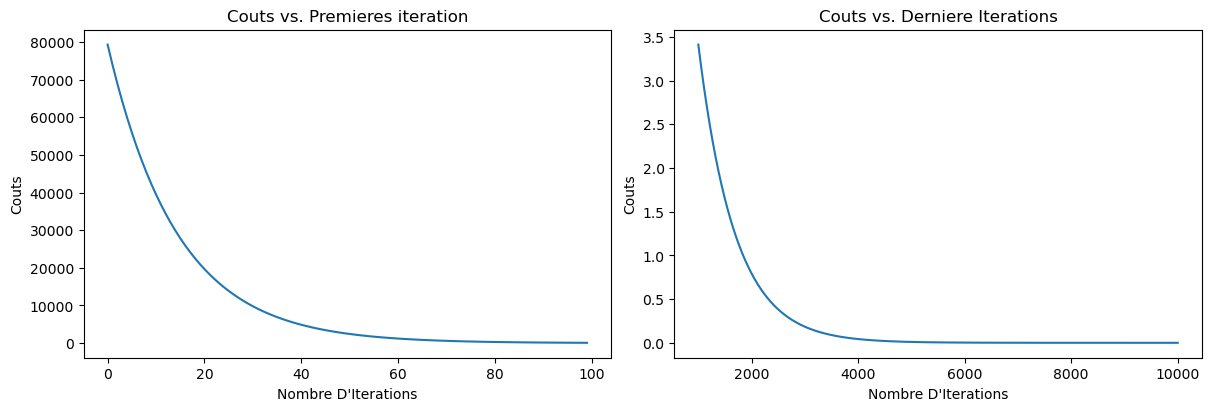

In [17]:
# plot Couts VS Iterations
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Couts vs. Premieres iteration");  ax2.set_title("Couts vs. Derniere Iterations")
ax1.set_ylabel('Couts')            ;  ax2.set_ylabel('Couts') 
ax1.set_xlabel('Nombre D\'Iterations')  ;  ax2.set_xlabel('Nombre D\'Iterations') 
plt.show()

In [19]:
# Utilisations Du Model pour realiser Quelques predictions 

print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars
